In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [2]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
Y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
Y_xor = np.where(Y_xor,1,-1)

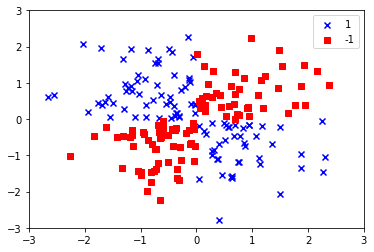

In [3]:
plt.scatter(X_xor[Y_xor==1,0],X_xor[Y_xor==1,1],marker='x',label=1,c='b')
plt.scatter(X_xor[Y_xor==-1,0],X_xor[Y_xor==-1,1],marker='s',label=-1,c='r')
plt.legend()
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.show()

In [4]:
svm = SVC(kernel='rbf',gamma=0.10,C=10.0,random_state=0)

In [5]:
#Fit the model
svm.fit(X_xor,Y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
marker = ('s','^','*')
colors = ['red','green','blue','gray']
cmap = ListedColormap(colors[:len(np.unique(Y_xor))])
    
def plot_decision_boundry(X,y,classifier):
    X1_min,X1_max = X[:,0].min() - 1,X[:,0].max() + 1
    X2_min,X2_max = X[:,1].min() - 1,X[:,1].max() + 1
    XX1,XX2 = np.meshgrid(np.arange(X1_min,X1_max,0.02),np.arange(X2_min,X2_max,0.02))
    z = classifier.predict(np.array([XX1.ravel(),XX2.ravel()]).T)
    z = z.reshape(XX1.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(XX1,XX2,z,alpha=0.3,cmap=cmap)
    plt.title('SVM Decision boundry')
    for idx,clas in enumerate(np.unique(y)):
        plt.scatter(X[y==clas,0],X[y==clas,1],alpha=1,marker=marker[idx],label=clas)

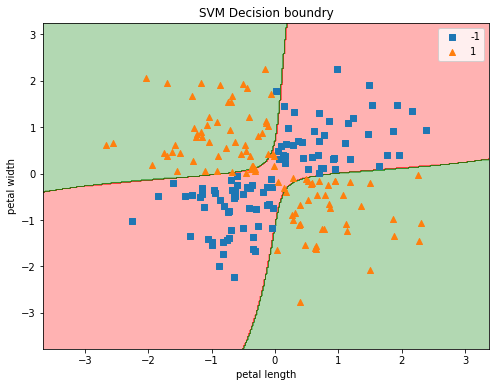

In [7]:
plot_decision_boundry(X_xor,Y_xor,svm)
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

## gama is the free parameter which needs to be optimized. In the above plot, we used lower value for the gama.
## Lets set the higher value for the gama and see its effect on the decision boundry.

In [8]:
svm = SVC(kernel='rbf',gamma=100,C=10.0,random_state=0)

In [9]:
#Fit the model
svm.fit(X_xor,Y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

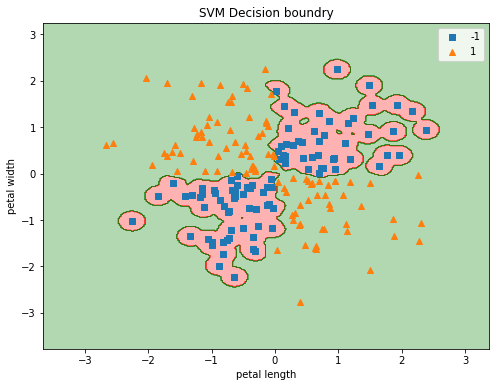

In [10]:
plot_decision_boundry(X_xor,Y_xor,svm)
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

## Above model fits the training data well but it will have high generalization error on unseen data